In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

In [7]:
folder = '/Users/danielferreira/Documents/git/pySETTV/06 - Utility & References/Data'
file = 'bat_22_clean.csv'
index = 'player_id'
os.chdir(folder)
bat_22 = pd.read_csv(file, index_col=index)


In [8]:
X = np.array(bat_22['batting_avg']).reshape(-1,1) # reshape is needed because sklearn always expect 2D arrays (for multiple linear regression)
y = bat_22['y_2023_avg']
model2 = LinearRegression()
model2.fit(X,y) # Fits model
y_pred = model2.predict(X) # Create predictions

In [9]:
# It is easy to calculate certain fit statistics. For example Rˆ2:
residuals = y - y_pred
total_var = y - y.mean()
SSE = np.dot(residuals,residuals)
SST = np.dot(total_var,total_var)
n = len(y)
k = X.shape[1]+1 # +1 for intercept
R2 = 1-(SSE/SST)
print(f'R Squared = {round(R2,3)}')
Adj_R2 = 1-((SSE/(n-k))/(SST/(n-1)))
print(f'Adjusted R Squared = {round(Adj_R2,3)}')

R Squared = 0.083
Adjusted R Squared = 0.081


<Axes: xlabel='y_2023_avg'>

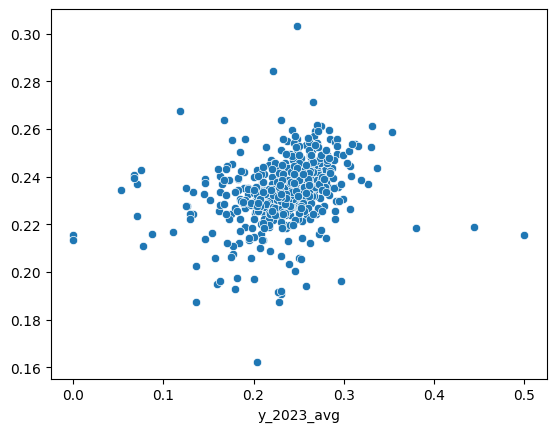

In [10]:
sns.scatterplot(x=y, y=y_pred)